In [49]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
df = pd.read_csv('../data/epsilon_greedy.csv')

In [51]:
df.head()

,epsilon,simNums,times,chosenArms,rewards,cumulativeRewards
0,0.1,1,1,0,0,0
1,0.1,1,2,0,0,0
2,0.1,1,3,0,0,0
3,0.1,1,4,1,0,0
4,0.1,1,5,0,0,0


In [52]:
df.describe()

,epsilon,simNums,times,chosenArms,rewards,cumulativeRewards
count,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000
mean,0.300000,10.500000,125.50000,3.132480,0.651840,76.425920
std,0.141424,5.766397,72.16965,1.446365,0.476397,52.310679
min,0.100000,1.000000,1.00000,0.000000,0.000000,0.000000
25%,0.200000,5.750000,63.00000,3.000000,0.000000,30.000000
50%,0.300000,10.500000,125.50000,4.000000,1.000000,74.000000
75%,0.400000,15.250000,188.00000,4.000000,1.000000,118.000000
max,0.500000,20.000000,250.00000,4.000000,1.000000,213.000000


In [53]:
## Example of multiple boolean indexing
# df2 = data[(data['epsilon'] == 0.1) & (data['chosenArms'] == 1.0)]
# df.index returns the row index

<IPython.core.display.Javascript object>


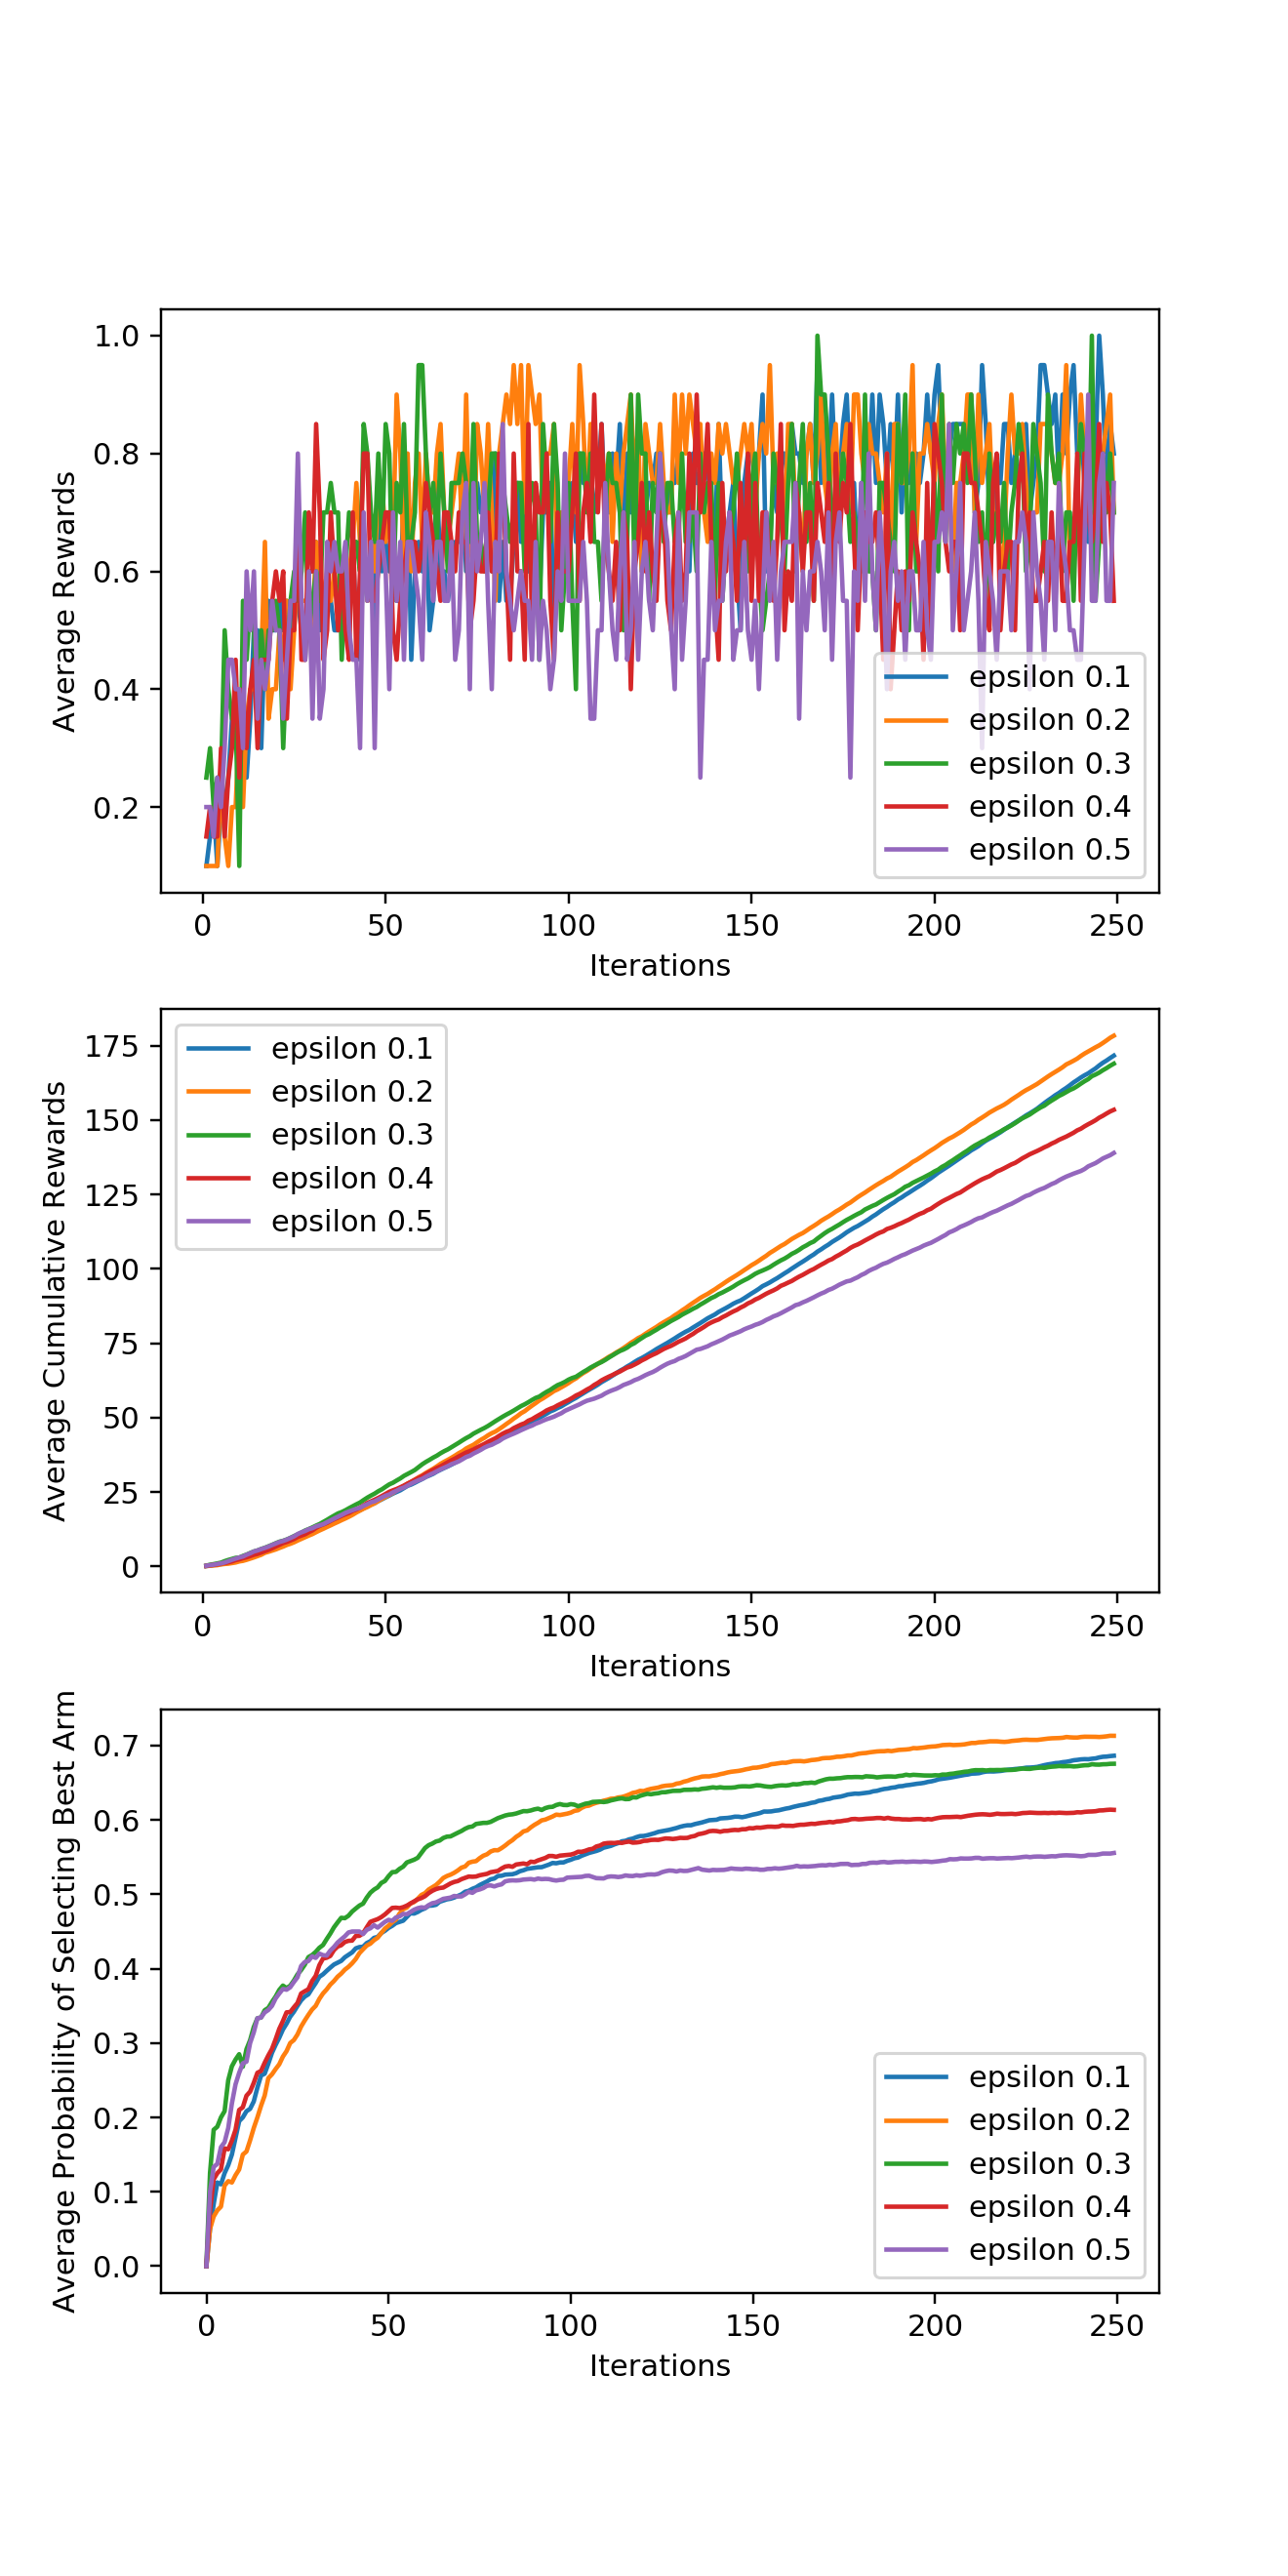

In [60]:
# Override the figure size
# plt.rcParams['figure.figsize'] = (6, 12)

nrows = 3
ncols = 1
width = 6 # in inches
height = 12 # in inches
f, (ax1, ax2, ax3) = plt.subplots(nrows, ncols, figsize=(width, height))

# Plot the average rewards and cumulative rewards against epsilon
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]
for _, epsilon in enumerate(epsilons):
    df2 = df[df['epsilon'] == epsilon]
    X, y1, y2, y3 = [], [], [], []
    
    # Attempted the 
    for i in range(250):
        X.append(i)
        
        # Get the column with the index times
        df3 = df2[df2['times'] == i]
        cumulative_rewards = df3['cumulativeRewards'].mean()
        y1.append(df3['rewards'].mean())
        y2.append(cumulative_rewards)        
        y3.append(cumulative_rewards / float(i + 1) if cumulative_rewards > 0 else 0)
    
    # Plot the rewards for different epsilon values
    ax1.plot(X, y1, label = 'epsilon {}'.format(epsilon))
    
    # Plot the cumulative rewards for different epsilon values
    ax2.plot(X, y2, label = 'epsilon {}'.format(epsilon)) 
    
    # Plot the probability of getting the best arms for different epsilon values
    ax3.plot(X, y3, label = 'epsilon {}'.format(epsilon)) 
    

# Plot the legends for both graphs
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Average Rewards')
ax1.legend()

ax2.set_xlabel('Iterations')
ax2.set_ylabel('Average Cumulative Rewards')
ax2.legend()

ax3.set_xlabel('Iterations')
ax3.set_ylabel('Average Probability of Selecting Best Arm')
ax3.legend()